In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from tensorflow import keras

2. Cargar los datos de entrenamiento y test

In [2]:
(X_train,y_train),(X_test,y_test)=keras.datasets.mnist.load_data()


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [3]:
#Normalización de los datos
x_ent = X_train / 255.0
x_pru = X_test / 255.0
#Por los valores máximos de los datos

4. Realizar una visualización de 20 imagenes aproximadamente, puede emplear el comando imshow con cmap= binary

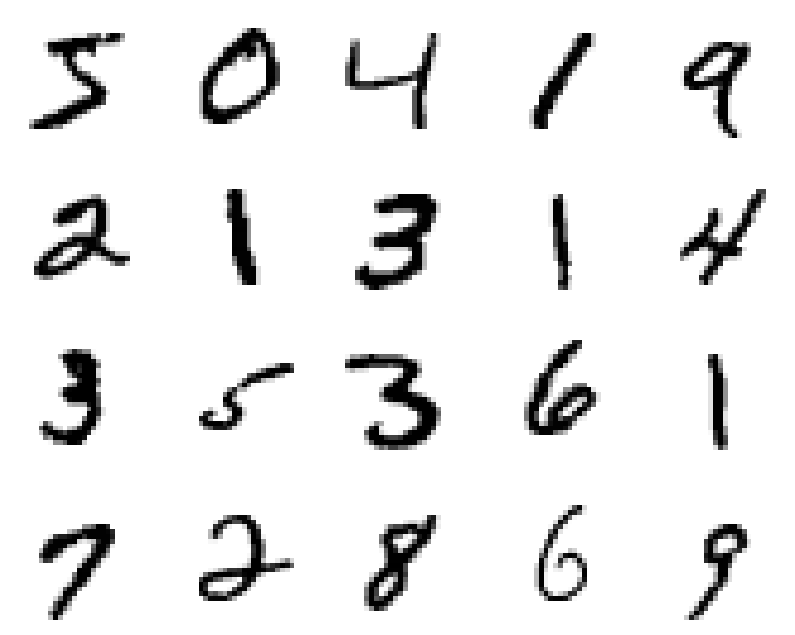

In [5]:
#visualización para 20

plt.figure(figsize=(10,8))

for i in range(20):
    plt.subplot(4,5,i+1)
    plt.imshow(x_ent[i], cmap="binary")
    plt.axis("off")

plt.show()

Implementar en keras, la red Letnet5, la arquitectura de la red es la siguiente:

In [6]:
keras.backend.clear_session()

x_ent = x_ent.reshape(x_ent.shape[0], 28, 28, 1)
x_pru = x_pru.reshape(x_pru.shape[0], 28, 28, 1)

modelo = keras.models.Sequential()

capa_conv1 = keras.layers.Conv2D(
    filters=6,
    kernel_size=5,
    activation="tanh",
    input_shape=(28, 28, 1)
)
modelo.add(capa_conv1)

capa_pool1 = keras.layers.MaxPool2D(pool_size=2)
modelo.add(capa_pool1)

capa_conv2 = keras.layers.Conv2D(
    filters=16,
    kernel_size=5,
    activation="tanh"
)
modelo.add(capa_conv2)

capa_pool2 = keras.layers.MaxPool2D(pool_size=2)
modelo.add(capa_pool2)

capa_flat = keras.layers.Flatten()
modelo.add(capa_flat)

capa_densa1 = keras.layers.Dense(120, activation="tanh")
modelo.add(capa_densa1)

capa_densa2 = keras.layers.Dense(84, activation="tanh")
modelo.add(capa_densa2)

capa_salida = keras.layers.Dense(10, activation="softmax")
modelo.add(capa_salida)

opt = keras.optimizers.Adam()
perdida = "sparse_categorical_crossentropy"

modelo.compile(
    optimizer=opt,
    loss=perdida,
    metrics=["accuracy"]
)

modelo.summary()


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 24, 24, 6)      │           156 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 12, 12, 6)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 8, 8, 16)       │         2,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 4, 4, 16)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 120)            │        30,840 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 84)             │        10,164 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           850 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 44,426 (173.54 KB)

 Trainable params: 44,426 (173.54 KB)

 Non-trainable params: 0 (0.00 B)

Aquí traté de implementar la red LeNet-5 de forma gradual, agregando cada capa una por una para que la estructura del modelo sea más clara y fácil de seguir. Primero se mira para ajustar la forma de las imágenes para que incluyan el canal necesario, luego se añaden capas convolucionales que detectan patrones simples y capas de agrupamiento que reducen la información. Ya por último las capas densas combinan lo aprendido hasta llegar a una salida que clasifica los dígitos.

6. Revisión del modelo

In [7]:
modelo.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 24, 24, 6)      │           156 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 12, 12, 6)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 8, 8, 16)       │         2,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 4, 4, 16)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 120)            │        30,840 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 84)             │        10,164 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           850 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 44,426 (173.54 KB)

 Trainable params: 44,426 (173.54 KB)

 Non-trainable params: 0 (0.00 B)

Vemos que está bien hecho!

7. Optimizador de Adams

In [9]:
y_ent = y_train
y_pru = y_test
#Aplicación de dicho optimizador
optimizador = "adam"
perdida = "sparse_categorical_crossentropy"
metricas = ["accuracy"]

modelo.compile(
    optimizer=optimizador,
    loss=perdida,
    metrics=metricas
)

historial = modelo.fit(
    x_ent,
    y_ent,
    epochs=10,
    batch_size=128,
    validation_split=0.1
)


Epoch 1/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 23s 50ms/step - accuracy: 0.8163 - loss: 0.6316 - val_accuracy: 0.9715 - val_loss: 0.0975
Epoch 2/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 21s 50ms/step - accuracy: 0.9717 - loss: 0.0950 - val_accuracy: 0.9832 - val_loss: 0.0651
Epoch 3/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 40s 48ms/step - accuracy: 0.9797 - loss: 0.0663 - val_accuracy: 0.9850 - val_loss: 0.0549
Epoch 4/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 21s 51ms/step - accuracy: 0.9845 - loss: 0.0500 - val_accuracy: 0.9860 - val_loss: 0.0513
Epoch 5/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 40s 49ms/step - accuracy: 0.9885 - loss: 0.0393 - val_accuracy: 0.9848 - val_loss: 0.0526
Epoch 6/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 41s 49ms/step - accuracy: 0.9901 - loss: 0.0321 - val_accuracy: 0.9873 - val_loss: 0.0431
Epoch 7/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 21s 49ms/step - accuracy: 0.9912 - loss: 0.0266 - val_accuracy: 0.9867 - val_loss: 0.0445
Epoch 8/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 40s 46ms/step - accuracy: 0.9939 - loss: 0.0203 - 

En esta parte se alista el modelo para aprender usando el optimizador Adam, que ajusta automáticamente la forma en que el modelo cambia sus parámetros durante el entrenamiento. En vez de usar una sola velocidad de aprendizaje fija, Este Adam adapta los ajustes según cómo se comportan los errores en cada paso, lo que suele hacer que el aprendizaje sea más estable y eficiente.

8. Realiza el fit del modelo, emplea GPU, para ello cambia la configuración de collaboratory para que tu modelo se ejecute un poco mas rápido.


In [10]:
history = modelo.fit(X_train,y_train,epochs=10,validation_split=0.3)

Epoch 1/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 23s 17ms/step - accuracy: 0.9649 - loss: 0.1148 - val_accuracy: 0.9746 - val_loss: 0.0816
Epoch 2/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 22s 17ms/step - accuracy: 0.9849 - loss: 0.0445 - val_accuracy: 0.9823 - val_loss: 0.0577
Epoch 3/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 41s 17ms/step - accuracy: 0.9898 - loss: 0.0309 - val_accuracy: 0.9810 - val_loss: 0.0600
Epoch 4/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 40s 17ms/step - accuracy: 0.9911 - loss: 0.0269 - val_accuracy: 0.9811 - val_loss: 0.0648
Epoch 5/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 22s 17ms/step - accuracy: 0.9917 - loss: 0.0243 - val_accuracy: 0.9820 - val_loss: 0.0632
Epoch 6/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 24s 18ms/step - accuracy: 0.9915 - loss: 0.0252 - val_accuracy: 0.9814 - val_loss: 0.0638
Epoch 7/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 23s 18ms/step - accuracy: 0.9918 - loss: 0.0240 - val_accuracy: 0.9753 - val_loss: 0.0909
Epoch 8/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 23s 17ms/step - accuracy: 0.9922 -

9. Predicción

In [11]:
q=modelo.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step


10. Muestra los valores de q y determina que numero se esta prediciendo.

In [12]:
x_pru_formato = X_test / 255.0
x_pru_formato = x_pru_formato.reshape(-1,28,28,1)
q = modelo.predict(x_pru_formato)
print(q[0])

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step
[5.9756552e-08 1.6931798e-06 6.8758126e-08 1.4850305e-06 1.0165262e-07
 2.5876229e-08 7.1869117e-13 9.9999338e-01 6.2062604e-08 3.1412981e-06]


In [13]:
numero_predicho = np.argmax(q[0])
print("Número predicho:", numero_predicho)

Número predicho: 7


Cada predicción q[i] es un vector con 10 números, cada uno representando la probabilidad de que la imagen corresponda a cada dígito (0 al 9). Para determinar qué número predice el modelo, se toma el valor más alto del vector. Por ejemplo, si la primera posición más alta está en el índice 7, eso significa que el modelo predice que la imagen es un 7. Esto permite pasar de un vector de probabilidades a una predicción concreta de dígito.

11. Puede graficar la convergencia del modelo con los siguiente código

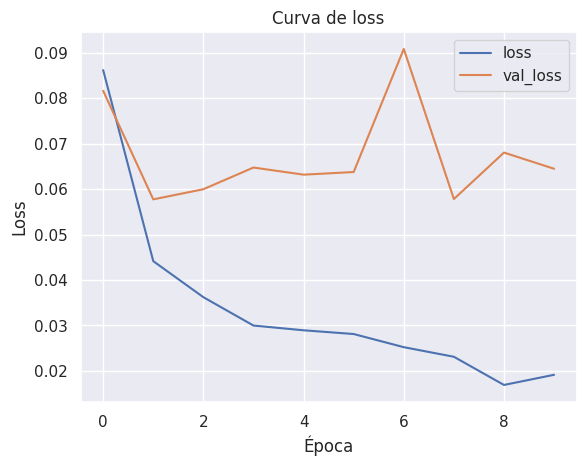

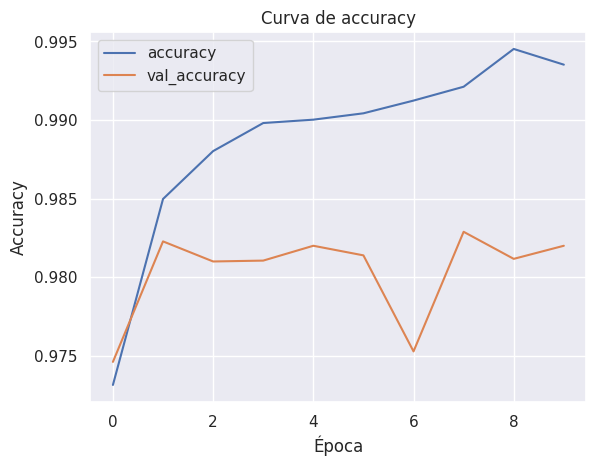

In [14]:
import matplotlib.pyplot as plt
# Graficar la curva de loss
plt.plot (history.history ['loss'], label='loss')
plt.plot (history.history ['val_loss'], label='val_loss')
plt.title ('Curva de loss')
plt.xlabel ('Época')
plt.ylabel ('Loss')
plt.legend ()
plt.show ()
# Graficar la curva de accuracy
plt.plot (history.history ['accuracy'], label='accuracy')
plt.plot (history.history ['val_accuracy'], label='val_accuracy')
plt.title ('Curva de accuracy')
plt.xlabel ('Época')
plt.ylabel ('Accuracy')
plt.legend ()
plt.show ()

12. Una forma alterna de implementar el modelo puede ser dada de la siguiente forma:

In [15]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.losses import sparse_categorical_crossentropy
from tensorflow.keras.optimizers import Adam

X_train = X_train.reshape(60000,28,28,1)
X_test = X_test.reshape(10000,28,28,1)
input_shape = (28,28,1)
model = Sequential()
model.add(Conv2D(6, kernel_size=(5, 5), activation='relu', input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2), strides=2))
#model.add(Dropout(0.25))
model.add(Conv2D(16, kernel_size=(5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=2))
#model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(84, activation='relu'))
model.add(Dense(10, activation='softmax'))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


13.

169001437/169001437 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


(np.float64(-0.5), np.float64(31.5), np.float64(31.5), np.float64(-0.5))

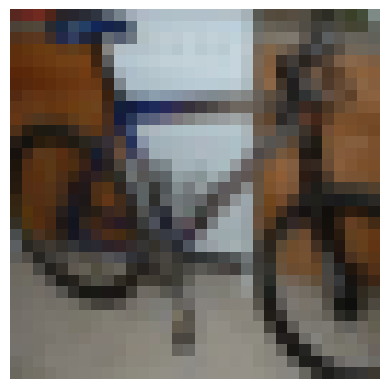

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from tensorflow import keras


(train_image, train_label) , (test_image, test_label) = keras.datasets.cifar100.load_data()


plt.imshow(train_image[30])
plt.axis('off')

In [17]:
keras.layers.Dropout(0.2),
keras.layers.BatchNormalization()

<BatchNormalization name=batch_normalization, built=False>

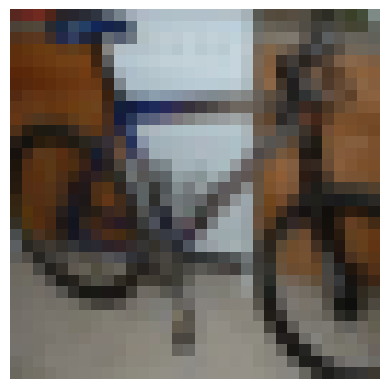

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 16, 16, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       524,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 100)            │        12,900 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 557,092 (2.13 MB)

 Trainable params: 556,900 (2.12 MB)

 Non-trainable params: 192 (768.00 B)

In [19]:
(train_imagen, train_etiqueta), (test_imagen, test_etiqueta) = keras.datasets.cifar100.load_data()

train_imagen = train_imagen / 255.0
test_imagen = test_imagen / 255.0

plt.imshow(train_imagen[30])
plt.axis('off')
plt.show()

keras.backend.clear_session()

modelo_cifar = keras.models.Sequential()

modelo_cifar.add(keras.layers.Conv2D(32, kernel_size=3, padding="same", input_shape=(32,32,3)))
modelo_cifar.add(keras.layers.BatchNormalization())
modelo_cifar.add(keras.layers.Activation("relu"))
modelo_cifar.add(keras.layers.MaxPool2D(pool_size=2))
modelo_cifar.add(keras.layers.Dropout(0.2))

modelo_cifar.add(keras.layers.Conv2D(64, kernel_size=3, padding="same"))
modelo_cifar.add(keras.layers.BatchNormalization())
modelo_cifar.add(keras.layers.Activation("relu"))
modelo_cifar.add(keras.layers.MaxPool2D(pool_size=2))
modelo_cifar.add(keras.layers.Dropout(0.3))

modelo_cifar.add(keras.layers.Flatten())
modelo_cifar.add(keras.layers.Dense(128, activation="relu"))
modelo_cifar.add(keras.layers.Dropout(0.5))
modelo_cifar.add(keras.layers.Dense(100, activation="softmax"))

modelo_cifar.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

modelo_cifar.summary()


Aquí estamos usando las mismas ideas de antes, pero más simple, pues la red toma las imágenes de CIFAR-100, que son más grandes y a color, y pasa por varias capas que ayudan a aprender los patrones de los objetos. Ponemos BatchNormalization para que la red aprenda más fácil y rápido, y Dropout para que no se confunda y no memorice demasiado los datos. Al final, la red decide a cuál de las 100 clases pertenece cada imagen. Nada de fórmulas raras, solo vamos viendo cómo se comporta la red y entrenamos.

14. Uso del compilador

In [20]:
modelo.compile(optimizer='nadam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


15.

In [24]:
early_stopping = keras.callbacks.EarlyStopping(patience=5, restore_best_weights=True)

historial = modelo_cifar.fit(
    train_imagen,
    train_etiqueta,
    epochs=30,
    batch_size=64,
    validation_split=0.2,
    callbacks=[early_stopping]
)

Epoch 1/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 93s 145ms/step - accuracy: 0.0093 - loss: 4.6462 - val_accuracy: 0.0077 - val_loss: 4.6063
Epoch 2/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 89s 142ms/step - accuracy: 0.0103 - loss: 4.6053 - val_accuracy: 0.0077 - val_loss: 4.6069
Epoch 3/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 141s 141ms/step - accuracy: 0.0106 - loss: 4.6053 - val_accuracy: 0.0077 - val_loss: 4.6073
Epoch 4/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 87s 140ms/step - accuracy: 0.0091 - loss: 4.6054 - val_accuracy: 0.0077 - val_loss: 4.6076
Epoch 5/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 145s 144ms/step - accuracy: 0.0118 - loss: 4.6050 - val_accuracy: 0.0077 - val_loss: 4.6077
Epoch 6/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 142s 144ms/step - accuracy: 0.0099 - loss: 4.6053 - val_accuracy: 0.0077 - val_loss: 4.6078


--2026-01-15 16:04:57--  https://upload.wikimedia.org/wikipedia/commons/f/f9/Zoorashia_elephant.jpg
Resolving upload.wikimedia.org (upload.wikimedia.org)... 208.80.154.240, 2620:0:861:ed1a::2:b
Connecting to upload.wikimedia.org (upload.wikimedia.org)|208.80.154.240|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 168370 (164K) [image/jpeg]
Saving to: ‘indian_elephant.jpg’

indian_elephant.jpg 100%[===================>] 164.42K  --.-KB/s    in 0.005s  

2026-01-15 16:04:57 (29.6 MB/s) - ‘indian_elephant.jpg’ saved [168370/168370]

--2026-01-15 16:04:57--  https://upload.wikimedia.org/wikipedia/commons/b/bf/African_Elephant_%28Loxodonta_africana%29_male_%2817289351322%29.jpg
Resolving upload.wikimedia.org (upload.wikimedia.org)... 208.80.154.240, 2620:0:861:ed1a::2:b
Connecting to upload.wikimedia.org (upload.wikimedia.org)|208.80.154.240|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 11612484 (11M) [image/jpeg]
Saving to: ‘african_ele

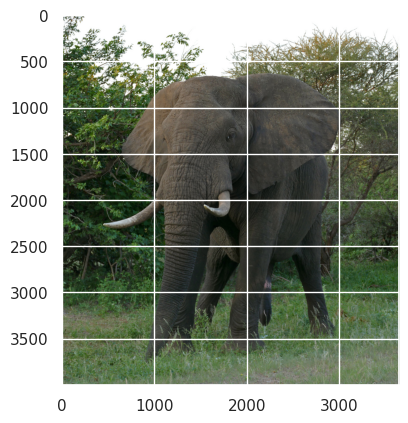

In [25]:
from tensorflow import keras
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

# Indian elephant
!wget https://upload.wikimedia.org/wikipedia/commons/f/f9/Zoorashia_elephant.jpg -O indian_elephant.jpg
# African elephant
!wget https://upload.wikimedia.org/wikipedia/commons/b/bf/African_Elephant_%28Loxodonta_africana%29_male_%2817289351322%29.jpg -O african_elephant.jpg
# !wget https://github.com/ssanchezgoe/diplomado_udea/blob/master/image/african_elephant_bull.jpg?raw=true -O african_elephant.jpg

# Choose the elephant to be classified
img_path = 'african_elephant.jpg'

img = mpimg.imread(img_path)
implot = plt.imshow(img)

print("Tamaño de la imagen:",img.shape)

In [26]:
from keras.preprocessing import image

model = keras.applications.vgg16.VGG16(weights='imagenet', include_top=True)
model.summary()

553467096/553467096 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ fc1 (Dense)                     │ (None, 4096)           │   102,764,544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ fc2 (Dense)                     │ (None, 4096)           │    16,781,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ predictions (Dense)             │ (None, 1000)           │     4,097,000 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 138,357,544 (527.79 MB)

 Trainable params: 138,357,544 (527.79 MB)

 Non-trainable params: 0 (0.00 B)

In [27]:
img = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)# Añadir una dimensión extra para el lote
x = keras.applications.vgg16.preprocess_input(x)

features = model.predict(x)

print("Prediction", keras.applications.vgg16.decode_predictions(features, top=3)[0])

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 691ms/step
35363/35363 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Prediction [('n02504458', 'African_elephant', np.float32(0.90143245)), ('n01871265', 'tusker', np.float32(0.08966324)), ('n02504013', 'Indian_elephant', np.float32(0.008881166))]
